In [1]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# Ajustar el tamaño predeterminado de las figuras
plt.rcParams['figure.figsize'] = [4,3]

from IPython import display

#from grafica import *
from ClassNeuronaLineal import NeuronaLineal

In [3]:
datos= pd.read_csv(DATOS_DIR+'CCPP.csv')
T = np.array(datos['PE'])
X = np.array(datos['AT'])
X = X.reshape(-1,1)
print(X)
print(T)

[[14.96]
 [25.18]
 [ 5.11]
 ...
 [31.32]
 [24.48]
 [21.6 ]]
[463.26 444.37 488.56 ... 429.57 435.74 453.28]


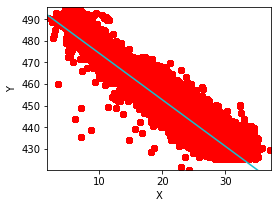

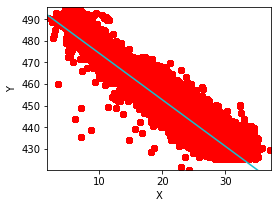

In [4]:
plt.clf()
nl = NeuronaLineal(alpha=0.0001, n_iter=50, cotaE=10e-06, draw=1, title=['X', 'Y'])
# --- utilice random_state=None para que los pesos se inicializacen en forma aleatoria --
nl.fit(X, T)

In [5]:
print("W = ", nl.w_)
print("b = ", nl.b_)

W =  [-2.15654917]
b =  495.7867447533226


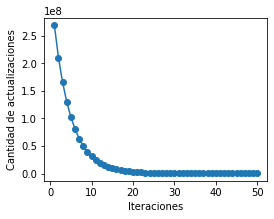

In [6]:
plt.clf()
plt.plot(range(1, len(nl.errors_) + 1), nl.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

In [9]:
N = len(nl.errors_)
print(np.abs(nl.errors_[N-1]-nl.errors_[N-2])/len(X))

0.05646328577922364
